## Data Science for Social Impact 
# Homework Wednesday: Visualization and Functions

Please complete this notebook by filling in the cells provided. The solved homework should be uploaded to Canvas.

#### Deadline:

This assignment is due on **Wednesday at 11:30pm**.

Directly sharing answers is not okay, but discussing problems with eachother is encouraged!


In [1]:
# Don't change this cell; just run it. 

import numpy as np
import pandas as pd


from matplotlib import pyplot as plt
plt.style.use('fivethirtyeight')

This data comes from Kaggle with the following description:
"Dataset Overview:
The Sleep Health and Lifestyle Dataset comprises 400 rows and 13 columns, covering a wide range of variables related to sleep and daily habits. It includes details such as gender, age, occupation, sleep duration, quality of sleep, physical activity level, stress levels, BMI category, blood pressure, heart rate, daily steps, and the presence or absence of sleep disorders.

Key Features of the Dataset:
Comprehensive Sleep Metrics: Explore sleep duration, quality, and factors influencing sleep patterns.
Lifestyle Factors: Analyze physical activity levels, stress levels, and BMI categories.
Cardiovascular Health: Examine blood pressure and heart rate measurements.
Sleep Disorder Analysis: Identify the occurrence of sleep disorders such as Insomnia and Sleep Apnea.

Dataset Columns:

Person ID: An identifier for each individual.

Gender: The gender of the person (Male/Female).

Age: The age of the person in years.

Occupation: The occupation or profession of the person.

Sleep Duration (hours): The number of hours the person sleeps per day.

Quality of Sleep (scale: 1-10): A subjective rating of the quality of sleep, ranging from 1 to 10.

Physical Activity Level (minutes/day): The number of minutes the person engages in physical activity daily.

Stress Level (scale: 1-10): A subjective rating of the stress level experienced by the person, ranging from 1 to 10.

BMI Category: The BMI category of the person (e.g., Underweight, Normal, Overweight).

Blood Pressure (systolic/diastolic): The blood pressure measurement of the person, indicated as systolic pressure over diastolic pressure.

Heart Rate (bpm): The resting heart rate of the person in beats per minute.

Daily Steps: The number of steps the person takes per day.

Sleep Disorder: The presence or absence of a sleep disorder in the person (None, Insomnia, Sleep Apnea).

Details about Sleep Disorder Column:

None: The individual does not exhibit any specific sleep disorder.
Insomnia: The individual experiences difficulty falling asleep or staying asleep, leading to inadequate or poor-quality sleep.
Sleep Apnea: The individual suffers from pauses in breathing during sleep, resulting in disrupted sleep patterns and potential health risks."

In [2]:
sleep_df=pd.read_csv('Sleep_health_dataset.csv')
sleep_df.head(10)

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
5,6,Male,28,Software Engineer,5.9,4,30,8,Obese,140/90,85,3000,Insomnia
6,7,Male,29,Teacher,6.3,6,40,7,Obese,140/90,82,3500,Insomnia
7,8,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,NaN
8,9,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,NaN
9,10,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,NaN


### Q1. To get a feel for the data, use a bar plot to graph the number of people by occupation that are included in this data. Make sure to label your graph!

A solution:

<AxesSubplot:title={'center':'Occupations Included in Study'}, xlabel='Number of people', ylabel='Occupation'>

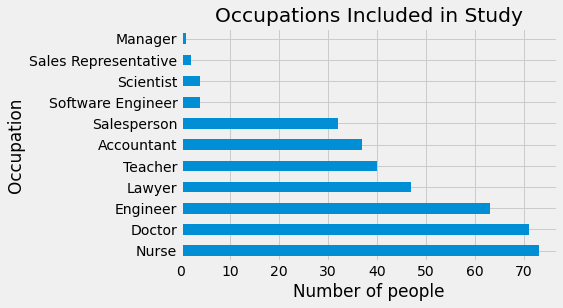

In [4]:
sleep_df['Occupation'].value_counts().plot.barh(title = 'Occupations Included in Study', xlabel='Number of people')

### Q2. Use an appropriate graph to visualize the average quality of sleep by gender.

A solution:

<AxesSubplot:title={'center':'Average Quality of Sleep by Gender'}, xlabel='Gender', ylabel='1-10 self reported scale'>

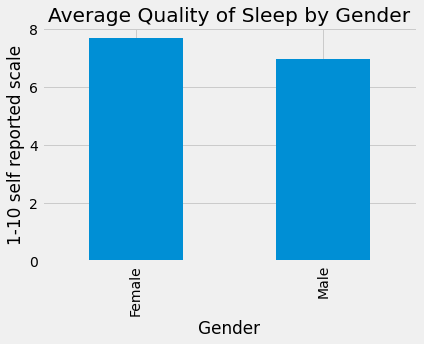

In [5]:
sleep_df.groupby('Gender')['Quality of Sleep'].mean().plot.bar(title = 'Average Quality of Sleep by Gender', ylabel = '1-10 self reported scale')

### Q3. Use a histogram to plot sleep duration.
Experiment with the bins and decide what makes sense.

A solution:

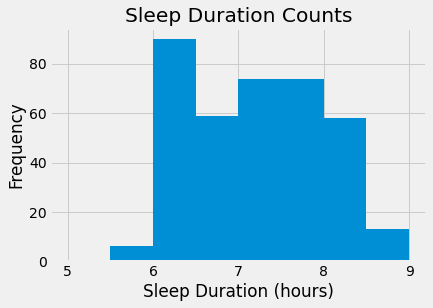

In [6]:
half_hour = [5,5.5,6,6.5,7,7.5,8,8.5,9]

hour = [5,6,7,8,9]

quarter_hour = np.arange(5,9.25,.25)

plt.hist(sleep_df['Sleep Duration'], bins = half_hour)
plt.title('Sleep Duration Counts')
plt.xlabel('Sleep Duration (hours)')
plt.ylabel('Frequency')
plt.show()


#note we decided bin ranges, so it is a good idea to ensure all of the data is contained in our visualization!
#we can find the max and min to make sure everything is accounted for
#sleep_df['Sleep Duration'].max()
#sleep_df['Sleep Duration'].min()

### Q4: Use an appropriate graph to visualize average sleep duration by occupation.

A solution:

<AxesSubplot:title={'center':'Average Sleep Duration by Occupation'}, xlabel='Hours of Sleep', ylabel='Occupation'>

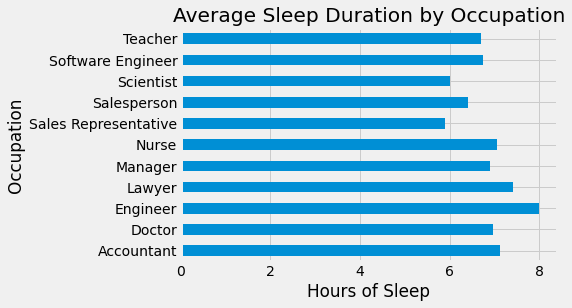

In [7]:
sleep_df.groupby('Occupation')['Sleep Duration'].mean().plot.barh(title = 'Average Sleep Duration by Occupation', xlabel = 'Hours of Sleep')


### Q5: Use an appropriate graph to visualize sleep duration of those who have sleep apnea.

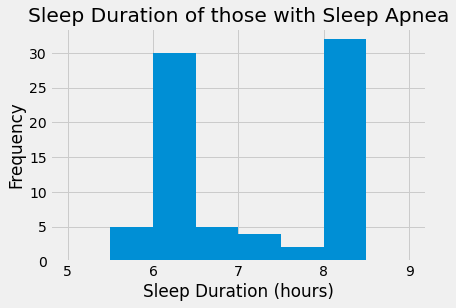

In [8]:
## one possible solution
sleep_disorder = sleep_df.groupby('Sleep Disorder')

only_sleep_apnea = sleep_disorder.get_group('Sleep Apnea')
only_sleep_apnea



plt.hist(only_sleep_apnea['Sleep Duration'], bins = half_hour)
plt.title('Sleep Duration of those with Sleep Apnea')
plt.xlabel('Sleep Duration (hours)')
plt.ylabel('Frequency')
plt.show()

The American College of Cardiology/American Heart Association Guideline (https://www.cdc.gov/bloodpressure/index.htm) classifies the following for blood pressure levels

| Blood Pressure  | Numerator/Denominator          |
|----------|---------------------------------------------|
| Normal   | Numerator < 120; Denominator < 80           |
| Elevated | Numerator in range 120–129; Denominator < 80 |
| High     | Numerator >= 130 OR Denominator >= 80             |
|          |                                             |

### Q6: Make a new column in the Dataframe that classifies 'Blood Pressure' as 'Normal', 'Elevated', or 'High'. Note that currently the elements in column 'Blood Pressure' are string data types.

A solution:

In [9]:
def blood_pres(string_entry):
    '''input is a string element corresponding to blood pressure, output is label of normal, elevated, or high'''
    
    #first we split into integer values
    string_list = string_entry.split('/')
    int_list = []
    for i in string_list:
        int_list.append(int(i))
        
    #compare the numerator and denominator
    if int_list[0] < 120 and int_list[1] < 80:
        return 'Normal'
    elif 120 <= int_list[0] <= 129 and int_list[1] < 80:
        return 'Elevated'
    elif int_list[0] >= 130 or int_list[1] >= 80: #could have used an else statement here
        return 'High'        

In [10]:
blood_pres(sleep_df['Blood Pressure'][0]) #test on a single column entry

'High'

In [11]:
sleep_df['Blood Pressure Rating'] = sleep_df['Blood Pressure'].apply(blood_pres)
sleep_df

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,Blood Pressure Rating
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN,High
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN,High
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN,High
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,High
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,High
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,High
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,High
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,High


In [12]:
sleep_df['Blood Pressure Rating'].value_counts() # wow a lot of people have high blood pressure!

Blood Pressure Rating
High        332
Normal       41
Elevated      1
Name: count, dtype: int64

### Question 7.  Create an overlapping histogram comparing Quality of Sleep with Stress Level

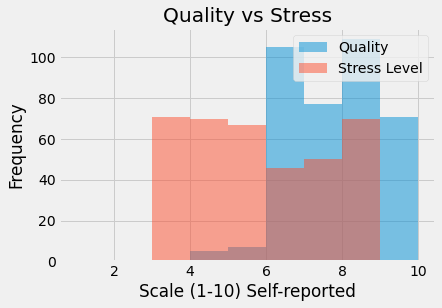

In [14]:
binz = np.arange(1,11, step = 1)

plt.hist(sleep_df['Quality of Sleep'], alpha=0.5, bins = binz, label = 'Quality')
plt.hist(sleep_df['Stress Level'], alpha=0.5, bins = binz, label = 'Stress Level')
plt.legend(loc='upper right')
plt.title('Quality vs Stress')
plt.xlabel('Scale (1-10) Self-reported')
plt.ylabel('Frequency')
plt.show()